<a href="https://colab.research.google.com/github/xylon-b/3D_project/blob/main/Assignment03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


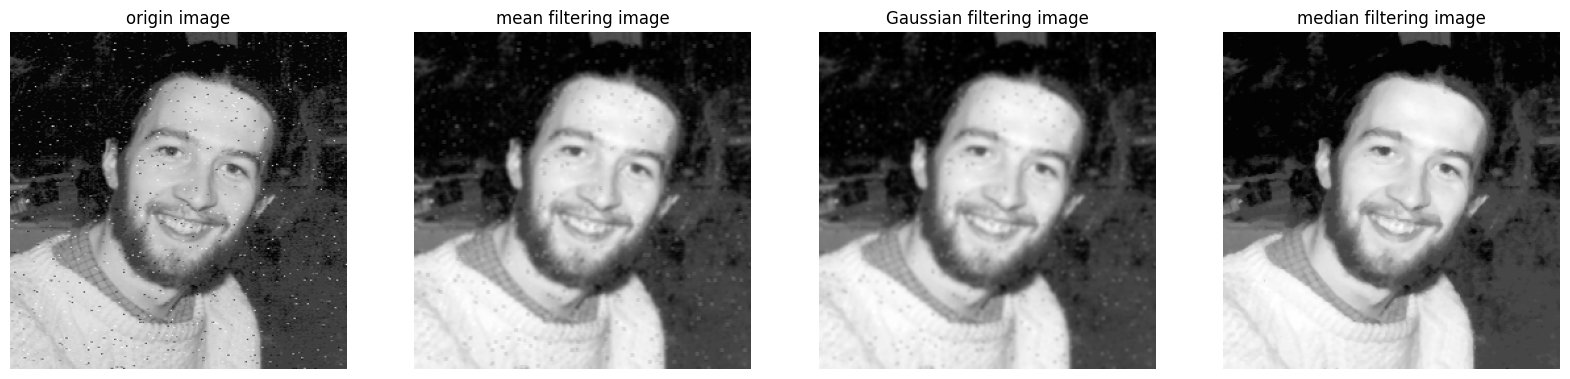

In [ ]:
#1. Noise removal - fce(salt_peppr noise).bmp 이미지를 활용하여 아래 3가지 필터링을 적용 후 결과를 비교분석 하시오
# 1) Average filtering 적용 결과
# 2) Gaussian filtering 적용 결과
# 3) Median filtering 적용 결과

from google.colab.patches import cv2_imshow
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/gdrive')

# 영상 불러오기
img = cv2.imread('/content/gdrive/My Drive/Image_Processing/Assign03/fce(salt_pepper noise).bmp')

# 컬러 영상을 그레이 영상으로 변환
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# 계수가 1/9로 구성된 3 * 3 커널 만들기
kernal = np.ones((3, 3), np.float32) / 9

average_img = cv2.filter2D(gray_img, -1, kernal)

# 그림을 화면에 출력하기
plt.figure(figsize = (20, 20))
plt.subplot(1, 4, 1)
plt.title("origin image")
plt.axis("off")
plt.imshow(gray_img, cmap = 'gray')

# 1) 평균 필터링 구현하기
plt.subplot(1, 4, 2)
plt.title("mean filtering image")
plt.axis("off")
plt.imshow(average_img, cmap = 'gray')

# 2) 가우시안 필터링 구현하기
gaussian_img = cv2.GaussianBlur(gray_img, (5, 5), 0)
plt.subplot(1, 4, 3)
plt.title("Gaussian filtering image")
plt.axis("off")
plt.imshow(gaussian_img, cmap = 'gray')

# 3) 중간 필터링 구현하기
median_img = cv2.medianBlur(gray_img, 3) # 3 * 3 크기의 중간값 커널을 입력영상에 적용한다.
plt.subplot(1, 4, 4)
plt.title("median filtering image")
plt.axis("off")
plt.imshow(median_img, cmap = 'gray')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


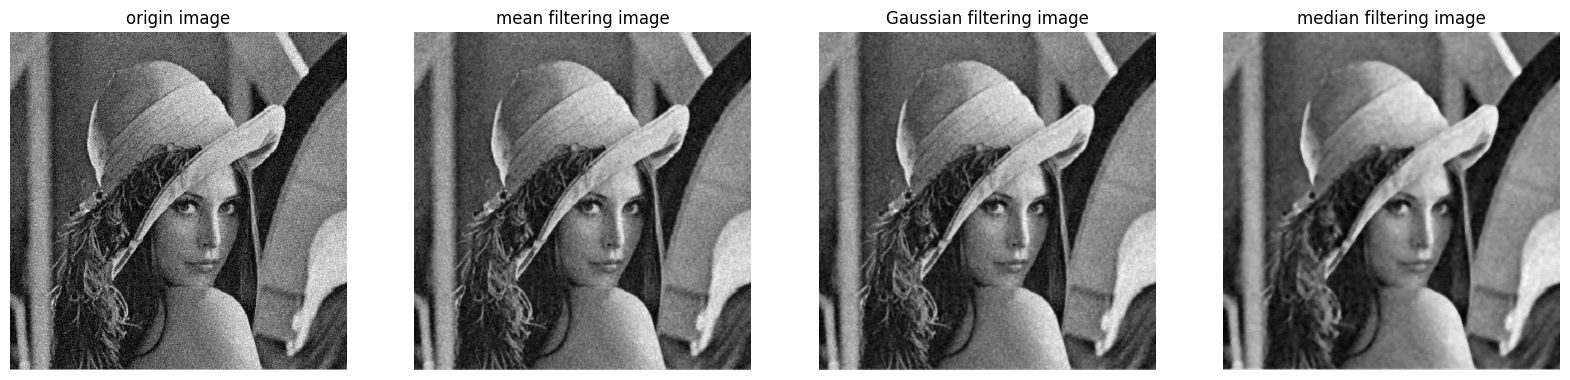

In [ ]:
#2. Noise removal - Copy of Lena-Gaussian-noise2.jpg 이미지를 활용하여 1번의 1),2),3) 수행한 후 결과 비교분석

from google.colab.patches import cv2_imshow
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/gdrive')

# 영상 불러오기
img = cv2.imread('/content/gdrive/My Drive/Image_Processing/Assign03/Copy of Lena-Gaussian-noise2.jpg')

# 컬러 영상을 그레이 영상으로 변환
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# 계수가 1/9로 구성된 3 * 3 커널 만들기
kernal = np.ones((3, 3), np.float32) / 9

average_img = cv2.filter2D(gray_img, -1, kernal)

# 그림을 화면에 출력하기
plt.figure(figsize = (20, 20))
plt.subplot(1, 4, 1)
plt.title("origin image")
plt.axis("off")
plt.imshow(gray_img, cmap = 'gray')

# 1) 평균 필터링 구현하기
plt.subplot(1, 4, 2)
plt.title("mean filtering image")
plt.axis("off")
plt.imshow(average_img, cmap = 'gray')

# 2) 가우시안 필터링 구현하기
gaussian_img = cv2.GaussianBlur(gray_img, (5, 5), 0)
plt.subplot(1, 4, 3)
plt.title("Gaussian filtering image")
plt.axis("off")
plt.imshow(gaussian_img, cmap = 'gray')

# 3) 중간 필터링 구현하기
median_img = cv2.medianBlur(gray_img, 7) # 3 * 3 크기의 중간값 커널을 입력영상에 적용한다.
plt.subplot(1, 4, 4)
plt.title("median filtering image")
plt.axis("off")
plt.imshow(median_img, cmap = 'gray')


Mounted at /content/gdrive


(<Axes: title={'center': 'robert cross edge detection'}>,
 (0.0, 1.0, 0.0, 1.0),
 Text(0.5, 1.0, 'robert cross edge detection'),
 <matplotlib.image.AxesImage at 0x7f3dbb021fd0>)

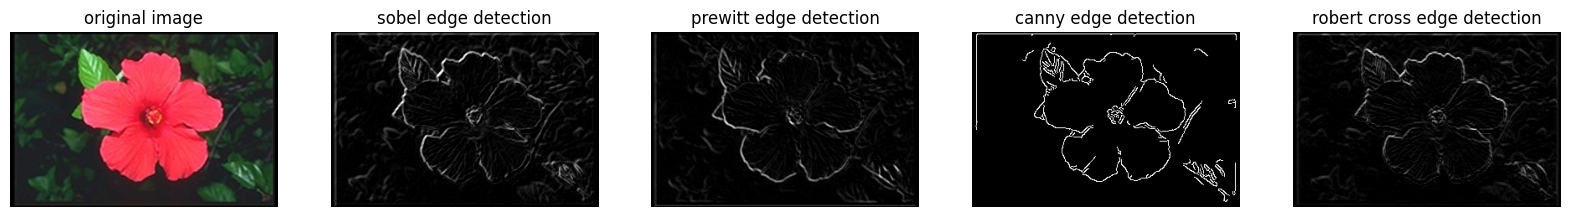

In [ ]:
# 3. flower.bmp 이용하여 다음을 수행하고 결과 비교 분석
#   1) sobel 적용 후 엣지 검출
#   2) prewitt 적용 후 엣지 검출
#   3) canny 적용 후 엣지 검출
#   4) robert cross 적용 후 엣지 검출

from google.colab.patches import cv2_imshow
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/gdrive')

# 영상 불러오기
img = cv2.imread('/content/gdrive/My Drive/Image_Processing/Assign03/flower.bmp')
# plt BGR뒤집기
src_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 영상을 grayscale로 변환
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# sobel 적용 후 엣지 검출
x = cv2.Sobel(gray_img, -1, 1, 0)
y = cv2.Sobel(gray_img, -1, 0, 1)
#unit8 타입으로 변경하고 영상 합치기
absX = cv2.convertScaleAbs(x)
absY = cv2.convertScaleAbs(y)
sobel_output_img = cv2.addWeighted(absX, 0.5, absY, 0.5, 0)

# prewitt 적용 후 엣지 검출
# 프르윗 필터
gx = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]], dtype = int)
gy = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]], dtype = int)
# 프르윗 필터 컨벌루션
px = cv2.filter2D(gray_img, -1, gx)
py = cv2.filter2D(gray_img, -1, gy)
# unit8 타입으로 변경하고 영상 합치기
p_absX = cv2.convertScaleAbs(px)
p_absY = cv2.convertScaleAbs(py)
prewitt_output_img = cv2.addWeighted(p_absX, 0.5, p_absY, 0.5, 0)

# canny 적용 후 엣지 검출
canny_output_img = cv2.Canny(gray_img, 100, 200)

# rovert cross 적용 후 엣지 검출
r_gx = np.array([[-1, 0], [0, 1]], dtype = int)
r_gy = np.array([[0, -1], [1, 0]], dtype = int)
#로버트 크로서 컨벌루션
r_x = cv2.filter2D(gray_img, -1, r_gx)
r_y = cv2.filter2D(gray_img, -1, r_gy)
# unit8타입으로 변경하고 영상 합하기
r_absX = cv2.convertScaleAbs(r_x)
r_absY = cv2.convertScaleAbs(r_y)
r_output_img = cv2.addWeighted(r_absX, 0.5, r_absY, 0.5, 0)

# 영상 크기 키우기
plt.figure(figsize = (20, 20))

plt.subplot(1, 5, 1), plt.axis("off"), plt.title("original image"), plt.imshow(src_img)

plt.subplot(1, 5, 2),plt.axis("off"),plt.title("sobel edge detection"),plt.imshow(sobel_output_img, cmap = 'gray')

plt.subplot(1, 5, 3),plt.axis("off"),plt.title("prewitt edge detection"),plt.imshow(prewitt_output_img, cmap = 'gray')

plt.subplot(1, 5, 4),plt.axis("off"),plt.title("canny edge detection"),plt.imshow(canny_output_img, cmap = 'gray')

plt.subplot(1, 5, 5),plt.axis("off"),plt.title("robert cross edge detection"),plt.imshow(r_output_img, cmap = 'gray')
